# Final Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
# read in the data
data = pd.read_csv(r"C:\Users\anusha\Desktop\eco421\Traffic_Crashes.csv", low_memory = False)

In [52]:
#turn it into a data frame
data = pd.DataFrame(data)
df = data[data.columns[data.isnull().mean() < .60]]
df1 = pd.DataFrame(df)
df1.dropna(inplace= True)
df2 = df1

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193663 entries, 1 to 491738
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                193663 non-null  object 
 1   RD_NO                          193663 non-null  object 
 2   CRASH_DATE                     193663 non-null  object 
 3   POSTED_SPEED_LIMIT             193663 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         193663 non-null  object 
 5   DEVICE_CONDITION               193663 non-null  object 
 6   WEATHER_CONDITION              193663 non-null  object 
 7   LIGHTING_CONDITION             193663 non-null  object 
 8   FIRST_CRASH_TYPE               193663 non-null  object 
 9   TRAFFICWAY_TYPE                193663 non-null  object 
 10  LANE_CNT                       193663 non-null  float64
 11  ALIGNMENT                      193663 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [55]:
#encode Traffic control device 
tcd = df2['TRAFFIC_CONTROL_DEVICE'].unique()
tcd_dict = {}
i = 0
for type  in tcd:
    tcd_dict[type] = i
    i = i+1

#encode device conditions
dcc = df2['DEVICE_CONDITION'].unique()
dcc_dict = {}
i = 0
for type  in dcc:
    dcc_dict[type] = i
    i = i+1
# dcc_dict

#encode weather conditions
wc = df2['WEATHER_CONDITION'].unique()
wc_dict = {}
i = 0
for type  in wc:
    wc_dict[type] = i
    i = i+1
# wc_dict

#Encode lighting Conditions
lc = df2['LIGHTING_CONDITION'].unique()
lc_dict = {}
i = 0
for type  in lc:
    lc_dict[type] = i
    i = i+1
# lc_dict

#Encoding crash type
fct = df2['FIRST_CRASH_TYPE'].unique()
fct_dict = {}
i = 0
for type  in fct:
    fct_dict[type] = i
    i = i+1
# fct_dict

#Encode Traffic type
tt = df2['TRAFFICWAY_TYPE'].unique()
tt_dict = {}
i = 0
for type  in tt:
    tt_dict[type] = i
    i = i+1
#tt_dict

#Encode ALIGNMENT type
a = df2['ALIGNMENT'].unique()
a_dict = {}
i = 0
for type  in a:
    a_dict[type] = i
    i = i+1
#a_dict

#encode ROADWAY_SURFACE_COND  type
rsc = df2['ROADWAY_SURFACE_COND'].unique()
rsc_dict = {}
i = 0
for type  in rsc:
    rsc_dict[type] = i
    i = i+1
#rsc_dict

#encode ROAD_DEFECT type
rd = df2['ROAD_DEFECT'].unique()
rd_dict = {}
i = 0
for type  in rd:
    rd_dict[type] = i
    i = i+1
#rd_dict

#encode REPORT_TYPE type
rt = df2['REPORT_TYPE'].unique()
rt_dict = {}
i = 0
for type  in rt:
    rt_dict[type] = i
    i = i+1
#rt_dict

# Encode CRASH_TYPE type
ct = df2['CRASH_TYPE'].unique()
ct_dict = {}
i = 0
for type  in ct:
    ct_dict[type] = i
    i = i+1
#ct_dict

#encode DAMAGE type
d = df2['DAMAGE'].unique()
d_dict = {}
i = 0
for type  in d:
    d_dict[type] = i
    i = i+1
#d_dict

#encode STREET_DIRECTION 
dpn = df2['STREET_DIRECTION'].unique()
dpn_dict = {}
i = 0
for type  in dpn:
    dpn_dict[type] = i
    i = i+1
#dpn_dict

#encode PRIM_CONTRIBUTORY_CAUSE
pcc = df2['PRIM_CONTRIBUTORY_CAUSE'].unique()
pcc_dict = {}
i = 0
for type  in pcc:
    pcc_dict[type] = i
    i = i+1
#pcc_dict

#encode for MOST_SEVERE_INJURY 
msi = df2['MOST_SEVERE_INJURY'].unique()
msi_dict = {}
i = 0
for type  in msi:
    msi_dict[type] = i
    i = i+1
#msi_dict

#encode for SEC_CONTRIBUTORY_CAUSE
scc = df2['SEC_CONTRIBUTORY_CAUSE'].unique()
scc_dict = {}
i = 0
for type  in scc:
    scc_dict[type] = i
    i = i+1
#scc_dict

df2.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
16,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
24,03c8fee8a0cb0d303e972a873228b444a47b7b1ed1e2d9...,JB317419,06/22/2018 07:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,2.0,0.0,2.0,0.0,7,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
28,046c0f96fdf5f7384e026821bb23fdd56d610dce11247b...,JC128226,01/24/2019 06:45:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,6,5,1,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)


In [56]:
encoded_df = {'TRAFFIC_CONTROL_DEVICE':  tcd_dict   ,
                'DEVICE_CONDITION': dcc_dict,
                'WEATHER_CONDITION':wc_dict,
                'LIGHTING_CONDITION':lc_dict,
                'FIRST_CRASH_TYPE':fct_dict,
                'TRAFFICWAY_TYPE':tt_dict,
                'ALIGNMENT':a_dict,
                'ROADWAY_SURFACE_COND':rsc_dict,
                'ROAD_DEFECT':rd_dict,
                'REPORT_TYPE':rt_dict,
                'CRASH_TYPE':ct_dict,
                'DAMAGE':d_dict,
                'STREET_DIRECTION':dpn_dict,
                'PRIM_CONTRIBUTORY_CAUSE':pcc_dict,
                'MOST_SEVERE_INJURY':msi_dict,
              'SEC_CONTRIBUTORY_CAUSE':scc_dict
                }
df3 = df2.replace(encoded_df)

In [57]:
df3.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,06/30/2017 04:00:00 PM,35,0,0,0,0,0,0,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,03/21/2019 10:50:00 PM,30,1,0,0,1,0,0,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
16,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,05/09/2018 11:30:00 AM,25,2,1,1,0,1,0,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
24,03c8fee8a0cb0d303e972a873228b444a47b7b1ed1e2d9...,JB317419,06/22/2018 07:25:00 AM,35,1,0,1,0,0,0,...,2.0,0.0,2.0,0.0,7,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
28,046c0f96fdf5f7384e026821bb23fdd56d610dce11247b...,JC128226,01/24/2019 06:45:00 AM,30,2,1,0,1,2,1,...,0.0,0.0,2.0,0.0,6,5,1,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193663 entries, 1 to 491738
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                193663 non-null  object 
 1   RD_NO                          193663 non-null  object 
 2   CRASH_DATE                     193663 non-null  object 
 3   POSTED_SPEED_LIMIT             193663 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         193663 non-null  int64  
 5   DEVICE_CONDITION               193663 non-null  int64  
 6   WEATHER_CONDITION              193663 non-null  int64  
 7   LIGHTING_CONDITION             193663 non-null  int64  
 8   FIRST_CRASH_TYPE               193663 non-null  int64  
 9   TRAFFICWAY_TYPE                193663 non-null  int64  
 10  LANE_CNT                       193663 non-null  float64
 11  ALIGNMENT                      193663 non-null  int64  
 12  ROADWAY_SURFACE_COND          

In [59]:
#remove unecessary features
del df3['CRASH_RECORD_ID']
del df3['RD_NO']
del df3['CRASH_DATE']
del df3['DATE_POLICE_NOTIFIED']
#del df3['SEC_CONTRIBUTORY_CAUSE']
del df3['STREET_NAME']
del df3['LOCATION']

In [60]:
df_target = df3[["FIRST_CRASH_TYPE"]]
df_target.head()

,FIRST_CRASH_TYPE
1,0
5,0
16,1
24,0
28,2


In [61]:
df4 = df3.copy()
del df4["FIRST_CRASH_TYPE"]
df_features = df4.replace()
print(df_features.dtypes)

POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE             int64
DEVICE_CONDITION                   int64
WEATHER_CONDITION                  int64
LIGHTING_CONDITION                 int64
TRAFFICWAY_TYPE                    int64
LANE_CNT                         float64
ALIGNMENT                          int64
ROADWAY_SURFACE_COND               int64
ROAD_DEFECT                        int64
REPORT_TYPE                        int64
CRASH_TYPE                         int64
DAMAGE                             int64
PRIM_CONTRIBUTORY_CAUSE            int64
SEC_CONTRIBUTORY_CAUSE             int64
STREET_NO                          int64
STREET_DIRECTION                   int64
BEAT_OF_OCCURRENCE               float64
NUM_UNITS                          int64
MOST_SEVERE_INJURY                 int64
INJURIES_TOTAL                   float64
INJURIES_FATAL                   float64
INJURIES_INCAPACITATING          float64
INJURIES_NON_INCAPACITATING      float64
INJURIES_REPORTE

In [62]:
# build-in function in sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3)

In [63]:
accuracy = []
FP_rate = []
recall = []

training: 0.2158758962556431
test: 0.21477133857725605


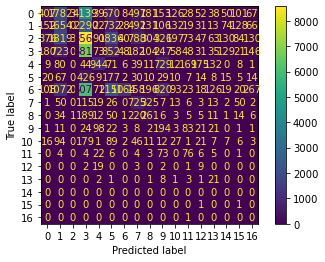

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)

# print training and test accuracy rate
print("training:",gnb.score(X_train,y_train.values.ravel()))
print("test:",gnb.score(X_test,y_test))

# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# record FP, recall rate
accuracy.append(gnb.score(X_test,y_test))

# plot confusion matrix
graph = plot_confusion_matrix(gnb, X_test, y_test)

# area under curve
#print("auc:" ,roc_auc_score(y_test, y_pred))

training: 1.0
test: 0.562488166749858


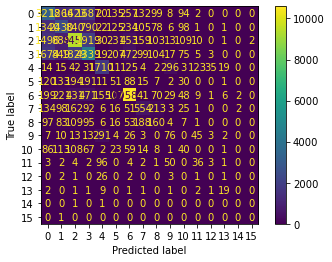

In [65]:
dt = tree.DecisionTreeClassifier(random_state=0) 
dt = dt.fit(X_train, y_train.values.ravel())
y_pred = dt.predict(X_test)

# print training and test accuracy rate
print("training:", dt.score(X_train,y_train.values.ravel()))
print("test:", dt.score(X_test,y_test))

# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# record FP, recall rate
accuracy.append(dt.score(X_test,y_test))

# plot confusion matrix
graph = plot_confusion_matrix(dt, X_test, y_test)

# area under curve
#print("auc:", roc_auc_score(y_test, y_pred))

training: 0.5590569767784958
test: 0.5601129107213549


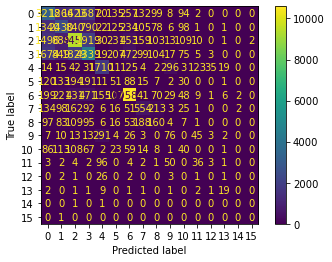

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, max_depth = 5, min_samples_leaf = 4)
rf.fit(X_train,y_train.values.ravel())
y_pred = rf.predict(X_test)

# print training and test accuracy rate
print("training:", rf.score(X_train,y_train.values.ravel()))
print("test:", rf.score(X_test,y_test))

# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# record FP, recall rate
accuracy.append(rf.score(X_test,y_test))

# plot confusion matrix
graph = plot_confusion_matrix(dt, X_test, y_test)

# area under curve
#print("auc:" ,roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000).fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test)

# print training and test accuracy rate
print("training:",lr.score(X_train,y_train.values.ravel()))
print("test:",lr.score(X_test,y_test))

# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# record FP, recall rate
accuracy,FP_rate,recall = [],[],[]
accuracy.append(lr.score(X_test,y_test))

# plot confusion matrix
graph = plot_confusion_matrix(lr, X_test, y_test)  

# area under curve
#print("auc:" ,roc_auc_score(y_test, y_pred))